In [1]:
# hack to import a module manually (e.g. slowkow's GTF.py)
# (since my standard python environment has duelling pip's between itself and homebrew)
# from https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path

import importlib.util
spec = importlib.util.spec_from_file_location("dict-tree", "/ru-auth/local/home/ezheng/src/dict-trie/dict_trie/dict_trie.py")
dict_tree = importlib.util.module_from_spec(spec)
spec.loader.exec_module(dict_tree)

In [2]:
trie = dict_tree.Trie()

In [3]:
trie.add("hello")

In [4]:
trie.add("world")

In [5]:
trie.add("goodbye")
trie.add("Alexander")
trie.add("Alecsander")
trie.add("Alexandre")

In [6]:
list(trie)

['hello', 'world', 'goodbye', 'Alexander', 'Alexandre', 'Alecsander']

In [7]:
%timeit trie.best_levenshtein('help', 2)

108 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
import sys
sys.getsizeof(trie)

56

In [3]:
from Bio import SeqIO

In [4]:
seq_list = [rec.seq for rec in SeqIO.parse("/ru-auth/local/home/ezheng/store/genome/dmel_r6.15_FB2017_02/fasta/dmel-all-translation-r6.15.fasta", "fasta")]

In [11]:
# constructing a trie for the drosophila proteome

In [8]:
import re

def splitkeepsep(s, sep):
    #method extremely vaguely (mostly the concept of an accumulator) based on 
    #http://programmaticallyspeaking.com/split-on-separator-but-keep-the-separator-in-python.html
    out = re.split(f"({sep})", s)
    
    acc = [] #accumulator to hold the output of the string
    for i in out:
        if re.match(f"{sep}", i):
            j = re.split(";", i)
            
            swap = acc.pop()
            swap = swap + j[0]
            acc.append(swap)
            #print ("bang", swap)
        else:
            acc.append(i)
    return acc

def digest(protein = "XXXXXXXX", cleavage = "trypsin"):
    
    if (cleavage != "trypsin"):
        raise ValueError("Error! non-trypsin sites not supported.")
        
    prepeptides = splitkeepsep(protein, sep="[KR]") 
    # note bracket bc we need that to get to the regex in splitkeepsep
    # also note that re.split will not bring along the cleavage site, 
    #     so splitkeepsep is necessary to tack on the lost cleavage site
    
    return prepeptides

In [9]:
%timeit digest("MRKJGLKJSAOJFOIJFDDMKFDLFK")

35.2 µs ± 4.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
str(seq_list[1])

'MTRYKQTEFTEDDSSSIGGIQLNEATGHTGMQIRYHTARATWNWRSRNKTEKWLLITTFVMAITIFTLLIVLFTDGGSSDATKHVLHVQPHQKDCPSGNELPCLNKHCIFASSEILKSIDVTVDPCDDFYGYSCNQWIKNNPIPEGKSTWGTFGKLEQMNQLIIRNVLEKPAKSFKSDAERKAKVYYESCLDADEHMEKLGAKPMNDLLLQIGGWNVTKSGYNVANWTMGHTLKILHNKYNFNCLFGWAIGEDDKNSSRHVIQIDQGGLTLPTADYYNNKTDNHRKVLNEYIEYMTKVCVLLGANESDARAQMIGVINFEKKLANITIPLEDRRNEEAMYHPMQLRQLSKLAPFLNWTDHFDNAMQMVGRRVTDDEVVVVYAPDFLKNLSDIILKMEQTEEGKITLNNYLVWQAVRTLTSCLSKPFRDAYKGVRKALMGSDGGEEIWRYCVSDTNNVVGFAVGAIFVRQAFHGESKPAAEQMIAEIREAFKMNLQNLTWVDKQTREKAIEKANQISDMIGFPDYILDPVELDKKYAELNITPNAYFENNIQVAIYNLKSNLKRLDQPVNKTNWGMTPQTVNAYYTPTKNQIVFPAGILQTPFFDINNPKSLNFGAMGVVMGHELTHAFDDQGREYDKFGNINRWWDSKSIERFNEKSECIARQYSGYKMNGRTLNGKQTLGENIADNGGLKAAYHAYQRTKSDRDVDILKLPGLNLTHSQLFFVSFAQVWCSSTTDETNLLQMEKDPHSPSQFRVIGTLSNMKEFAEVFQCKPGKRMNPTEKCEVW'

In [11]:
digest(str(seq_list[1]))

['MTR',
 'YK',
 'QTEFTEDDSSSIGGIQLNEATGHTGMQIR',
 'YHTAR',
 'ATWNWR',
 'SR',
 'NK',
 'TEK',
 'WLLITTFVMAITIFTLLIVLFTDGGSSDATK',
 'HVLHVQPHQK',
 'DCPSGNELPCLNK',
 'HCIFASSEILK',
 'SIDVTVDPCDDFYGYSCNQWIK',
 'NNPIPEGK',
 'STWGTFGK',
 'LEQMNQLIIR',
 'NVLEK',
 'PAK',
 'SFK',
 'SDAER',
 'K',
 'AK',
 'VYYESCLDADEHMEK',
 'LGAK',
 'PMNDLLLQIGGWNVTK',
 'SGYNVANWTMGHTLK',
 'ILHNK',
 'YNFNCLFGWAIGEDDK',
 'NSSR',
 'HVIQIDQGGLTLPTADYYNNK',
 'TDNHR',
 'K',
 'VLNEYIEYMTK',
 'VCVLLGANESDAR',
 'AQMIGVINFEK',
 'K',
 'LANITIPLEDR',
 'R',
 'NEEAMYHPMQLR',
 'QLSK',
 'LAPFLNWTDHFDNAMQMVGR',
 'R',
 'VTDDEVVVVYAPDFLK',
 'NLSDIILK',
 'MEQTEEGK',
 'ITLNNYLVWQAVR',
 'TLTSCLSK',
 'PFR',
 'DAYK',
 'GVR',
 'K',
 'ALMGSDGGEEIWR',
 'YCVSDTNNVVGFAVGAIFVR',
 'QAFHGESK',
 'PAAEQMIAEIR',
 'EAFK',
 'MNLQNLTWVDK',
 'QTR',
 'EK',
 'AIEK',
 'ANQISDMIGFPDYILDPVELDK',
 'K',
 'YAELNITPNAYFENNIQVAIYNLK',
 'SNLK',
 'R',
 'LDQPVNK',
 'TNWGMTPQTVNAYYTPTK',
 'NQIVFPAGILQTPFFDINNPK',
 'SLNFGAMGVVMGHELTHAFDDQGR',
 'EYDK',
 'FGNINR',
 '

In [6]:
'ILQLD'.replace('I','Z').replace('L','Z')

'ZZQZD'

In [12]:
seq_list = [rec.seq for rec in SeqIO.parse("/ru-auth/local/home/ezheng/store/genome/dmel_r6.15_FB2017_02/fasta/dmel-all-translation-r6.15.fasta", "fasta")]

In [13]:
# construct the working trie

newtrie = dict_tree.Trie()

count = 0

for i in seq_list: 
    for k in digest(str(i)):
        if (8 < len(k) < 22):
            newtrie.add(k.replace('I','Z').replace('L','Z'))
            count +=1

In [14]:
print(count)

569184


In [181]:
for k in digest(str(seq_list[1])):
    print(len(k))
    if (8 < len(k) < 22):
        print(k)

3
2
29
5
6
2
2
3
31
10
HVLHVQPHQK
13
DCPSGNELPCLNK
11
HCIFASSEILK
22
8
8
10
LEQMNQLIIR
5
3
3
5
1
2
15
VYYESCLDADEHMEK
4
16
PMNDLLLQIGGWNVTK
15
SGYNVANWTMGHTLK
5
16
YNFNCLFGWAIGEDDK
4
21
HVIQIDQGGLTLPTADYYNNK
5
1
11
VLNEYIEYMTK
13
VCVLLGANESDAR
11
AQMIGVINFEK
1
11
LANITIPLEDR
1
12
NEEAMYHPMQLR
4
20
LAPFLNWTDHFDNAMQMVGR
1
16
VTDDEVVVVYAPDFLK
8
8
13
ITLNNYLVWQAVR
8
3
4
3
1
13
ALMGSDGGEEIWR
20
YCVSDTNNVVGFAVGAIFVR
8
11
PAAEQMIAEIR
4
11
MNLQNLTWVDK
3
2
4
22
1
24
4
1
7
18
TNWGMTPQTVNAYYTPTK
21
NQIVFPAGILQTPFFDINNPK
24
4
6
5
4
4
6
6
4
5
14
QTLGENIADNGGLK
8
2
3
6
35
9
DPHSPSQFR
9
VIGTLSNMK
9
EFAEVFQCK
3
1
6
4


In [20]:
list(newtrie.all_hamming("YCVSDTNNVVGFAVGAIFVR", 3))

['YCVSDTNNVVGFAVGAIFVR']

## compute peptide specificities

In [15]:
# load Dmel peptides

import pandas as pd

fin_strictpeptides = pd.read_csv("~/results/Dmel_MSannot/fin_strictpeptides_annotated.csv")
metadata = pd.read_csv('~/results/Dmel_MSannot/fin_strictproteins_classes.csv')

In [16]:
metadata.sequence.drop_duplicates().shape

(1065,)

In [17]:
fin_strictpeptides.EBZ_IDnew.dropna().drop_duplicates().shape

(1056,)

In [18]:
fin_strictpeptides[~fin_strictpeptides.EBZ_IDnew.isin(metadata.EBZ_IDnew.dropna().drop_duplicates())] #.shape

,sequence_pep,EBZ_ID,length_pep,datasets,bestPEP,InFbpp_translation,blastp_hit,Var1,intergenic,antisense,sense,exonic,intronic,fiveUTR,threeUTR,EBZ_IDnew,annot,sequence_prot,length_prot,ATG
4,ADLSLDTMER,7,10,dev-adult.embryo.dev-embryo.PL,0.001500,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DVKADLSLDTMER,13,10
222,IAHTQTLTFSMRP,83,13,embryo.dev-embryo,0.005984,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAHTQTLTFSMRP,13,10
327,IICEFTMCTWRL,150,12,dev-adult.embryo.dev-embryo.PL,0.010853,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IICEFTMCTWRL,12,6
352,ALLLPLLDWKMI,170,12,dev-adult.embryo.dev-embryo.PL,0.000114,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALLLPLLDWKMI,12,10
550,FSLNFMHTAVK,333,11,embryo.dev-embryo.dev-adult,0.000013,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FSLNFMHTAVKC,12,5
611,QFIYAAYRTR,371,10,embryo,0.004360,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QFIYAAYRTRRRHM,14,13
663,KGATNNLLR,432,9,embryo,0.006385,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KGATNNLLRMGFM,13,9
764,NVDIEYKMK,530,9,embryo.PL,0.000468,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NVDIEYKMKNYNA,13,7
827,VNQENMVSQRRR,569,12,dev-adult.embryo.dev-embryo.PL,0.019203,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VNQENMVSQRRRQR,14,5
838,MLVNANKVQIYV,578,12,embryo.PL,0.004378,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MLVNANKVQIYV,12,0


In [ ]:
acc = []

for i in fin_strictpeptides["sequence_pep"]:
    i = i.replace('I','Z').replace('L','Z')
    acc.append(len(list(newtrie.all_hamming(i, 3))))

In [ ]:
fin_strictpeptides["sequence_pep"].drop_duplicates().shape

In [ ]:
fin_strictpeptides["hamming3"] = acc

In [ ]:
for i in fin_strictpeptides[fin_strictpeptides["hamming3"] >0]["sequence_pep"]:
    print(list(newtrie.all_hamming(i, 3)))

In [24]:
import matplotlib.pyplot as plt

In [ ]:
fin_strictpeptides[fin_strictpeptides["hamming3"] >0]["bestPEP"].describe()

In [25]:
fin_strictpeptides[fin_strictpeptides["hamming3"] >0]["bestPEP"].describe()

count    137.000000
mean       0.203432
std        0.321370
min        0.000016
25%        0.002153
50%        0.131920
75%        0.315900
max        2.840300
Name: bestPEP, dtype: float64

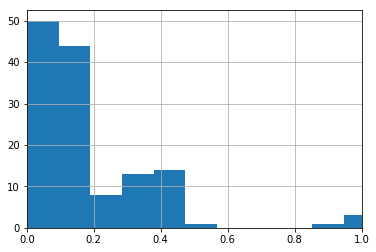

In [219]:
fin_strictpeptides[fin_strictpeptides["hamming3"] >0]["bestPEP"].hist(bins=30)
plt.xlim(0,1)
plt.show()

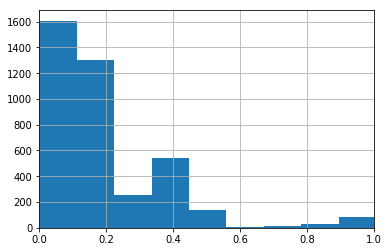

In [215]:
fin_strictpeptides["bestPEP"].hist(bins=100)
plt.xlim(0,1)
plt.show()

In [21]:
acc1 = []

for i in fin_strictpeptides["sequence_pep"]:
    i = i.replace('I','Z').replace('L','Z')
    acc1.append(len(list(newtrie.all_hamming(i, 1))))

In [22]:
fin_strictpeptides["hamming1"] = acc1

In [23]:
fin_strictpeptides[fin_strictpeptides["hamming1"] > 0]

,sequence_pep,EBZ_ID,length_pep,datasets,bestPEP,InFbpp_translation,blastp_hit,Var1,intergenic,antisense,...,exonic,intronic,fiveUTR,threeUTR,EBZ_IDnew,annot,sequence_prot,length_prot,ATG,hamming1
28,CHLTSLLIK,32,9,embryo,0.016970,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,4.0,74.0,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,1
2722,FLATHFLGTK,2295,10,PL,0.005178,0,False,EBZ_2295.1_sets_PL,1.0,0.0,...,0.0,0.0,0.0,0.0,2295.1,intergenic;,VSKSEKESDHSDSSIISVDLDSHQCNRQQLYKFLATHFLGTKC,43,-1,1


In [25]:
list(newtrie.all_hamming("FZATHFZGTK",2))

['FZAWHFZGTK']

In [26]:
acc2 = []

for i in fin_strictpeptides["sequence_pep"]:
    i = i.replace('I','Z').replace('L','Z')
    acc2.append(len(list(newtrie.all_hamming(i, 2))))

In [27]:
fin_strictpeptides["hamming2"] = acc2

In [28]:
fin_strictpeptides[fin_strictpeptides["hamming2"] > 0]

,sequence_pep,EBZ_ID,length_pep,datasets,bestPEP,InFbpp_translation,blastp_hit,Var1,intergenic,antisense,...,intronic,fiveUTR,threeUTR,EBZ_IDnew,annot,sequence_prot,length_prot,ATG,hamming1,hamming2
28,CHLTSLLIK,32,9,embryo,0.016970,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,74.0,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,1,1
373,RLPMMGHGR,193,9,dev-adult.embryo.dev-embryo.PL,0.000495,0,False,EBZ_193.1_sets_embryo.dev-adult,0.0,1.0,...,0.0,0.0,0.0,193.1,antisense;,RLPMMGHGRGPGAWVYF,17,3,0,1
796,MELLGYLNLK,550,10,embryo.dev-embryo.PL,0.000543,0,False,EBZ_550.1_sets_PL.embryo,0.0,0.0,...,0.0,0.0,1.0,550.1,sense;threeUTR;,MELLGYLNLKYSVNT,15,0,0,1
1481,IKLNADFQR,1203,9,embryo.dev-embryo,0.000716,0,False,EBZ_1203.1_sets_embryo.dev-embryo,0.0,0.0,...,1.0,0.0,0.0,1203.1,sense;intronic;,EKIPNMFIKIKLNADFQRLFYFNSIHCDTKPS,32,5,0,1
2115,LPELQEQQK,1698,9,PL,0.403420,0,False,EBZ_1698.1_sets_PL.dev-adult,0.0,1.0,...,0.0,0.0,0.0,1698.1,antisense;,LPELQEQQKAVPSPGARIAPQKNMKC,26,23,0,1
2143,ISFCLCAFR,1724,9,embryo.dev-embryo,0.413390,0,False,EBZ_1724.1_sets_PL,0.0,0.0,...,1.0,0.0,0.0,1724.1,sense;intronic;,IYNNRSSADLRNLHFAMGPEIAKMSRFGGFTAPQNRISFCLCAFRE...,59,16,0,1
2199,ISISKQQEK,1777,9,embryo.PL,0.020728,0,False,EBZ_1777.1_sets_PL,1.0,0.0,...,0.0,0.0,0.0,1777.1,intergenic;,VLNNMLLALNAFFGTQKKSKIMIQRLTIVMSLIPLRQERGAARNLK...,69,4,0,1
2638,INESQALLR,2220,9,PL,0.110460,0,False,EBZ_2220.1_sets_PL,0.0,0.0,...,1.0,0.0,0.0,2220.1,sense;intronic;,INESQALLRRGRRMMGRVVTATS,23,13,0,2
2722,FLATHFLGTK,2295,10,PL,0.005178,0,False,EBZ_2295.1_sets_PL,1.0,0.0,...,0.0,0.0,0.0,2295.1,intergenic;,VSKSEKESDHSDSSIISVDLDSHQCNRQQLYKFLATHFLGTKC,43,-1,1,1
2888,IELENVHLK,2430,9,embryo,0.315900,0,False,EBZ_2430.1_sets_PL.dev-embryo,0.0,0.0,...,1.0,0.0,0.0,2430.1,sense;intronic;,GKIGATEMARELLTLTFYGTRIELENVHLKYL,32,7,0,1


In [223]:
list(newtrie.all_hamming("FLATHFLGTK",2))

['FLAWHFLGTK']

In [227]:
fin_strictpeptides["sequence_pep"].drop_duplicates()

0                         NLIFSTAFTLQHK
1                          LHSFHFRFRHFR
2                       SAAQTARWRTLSLHF
3                             SAAQTARWR
4                            ADLSLDTMER
5                              EMHVTFRR
6                     QLFWSTIVEREMHVTFR
7                              RTTCPLCR
8                          GSIIKSDKNMSR
9                          IAALCLVFGVTR
10                            RWLEVGHAK
11             WLEVGHAKMQVRIAALCLVFGVTR
12                          QYTLLVAAKLR
13                              CRWTTLR
14                  CRWTTLRNHLSSECPTTYR
15                        FMIHTWQREGKCR
16      NHLSSECPTTYRFARAELCNAHLGILGAINK
17                       EAAHCCWHCFLSPR
18                      EIQNHASSSGAQNVK
19                             VPLIFASR
20                  ISDREIQNHASSSGAQNVK
21                ISDREIQNHASSSGAQNVKMR
22            LAGVSGIGAEMGMEILCVPMSAHLK
23                  WLMGKEAAHCCWHCFLSPR
24               EIQNHASSSGAQNVKMRTQCHK


In [29]:
fin_strictpeptides[fin_strictpeptides["hamming2"] > 0]["sequence_pep"].drop_duplicates()

28       CHLTSLLIK
373      RLPMMGHGR
796     MELLGYLNLK
1481     IKLNADFQR
2115     LPELQEQQK
2143     ISFCLCAFR
2199     ISISKQQEK
2638     INESQALLR
2722    FLATHFLGTK
2888     IELENVHLK
3095     VEYRQKLVR
3201    VHLSLEQLPK
3230     AHLQMLVLR
3702     LWLTLAMCK
Name: sequence_pep, dtype: object

In [236]:
list(newtrie.all_levenshtein_("FSKPFEILR",3))

# all_levenshtein counts each "way" to get a hit separately even though it's the same hit.

[('SNSPFEILR', 3, 'D=XI======'),
 ('SNSPFEILR', 3, 'D=IX======'),
 ('SNSPFEILR', 3, 'XXX======'),
 ('SNSPFEILR', 3, 'XI=D======'),
 ('SNSPFEILR', 3, 'IX=D======')]

In [237]:
# incantation to deduplicate the list
list(dict.fromkeys(list(newtrie.all_levenshtein("FSKPFEILR",3))))

['SNSPFEILR']

In [30]:
accl2 = []

for i in fin_strictpeptides["sequence_pep"]:
    i = i.replace('I','Z').replace('L','Z')
    accl2.append(len(list(dict.fromkeys(list(newtrie.all_levenshtein(i, 2))))))
    #               |-----------------|
    #                deduplicates the levenshtein hits

In [31]:
fin_strictpeptides["levenshtein2"] = accl2

In [32]:
fin_strictpeptides[fin_strictpeptides["levenshtein2"] > 0].drop_duplicates(subset="sequence_pep")

,sequence_pep,EBZ_ID,length_pep,datasets,bestPEP,InFbpp_translation,blastp_hit,Var1,intergenic,antisense,...,fiveUTR,threeUTR,EBZ_IDnew,annot,sequence_prot,length_prot,ATG,hamming1,hamming2,levenshtein2
28,CHLTSLLIK,32,9,embryo,1.697000e-02,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,1,1,1
32,DIFDIIIK,32,8,embryo.dev-embryo,3.942100e-03,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,0,0,1
59,IDGLLGQK,32,8,embryo.dev-embryo,1.312500e-03,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,0,0,1
145,VLVDIADK,32,8,embryo.dev-embryo,1.525200e-01,0,False,EBZ_32.1_sets_embryo.dev-embryo,105.0,60.0,...,1.0,1.0,32.1,intergenic;antisense;sense;exonic;intronic;fiv...,TINVDQKKWKNFKLADPDFNKPGRIDLIIGADVYTHILQNGVIKID...,1748,139,0,0,2
190,QVGMLAR,41,7,embryo,1.414100e-01,0,False,EBZ_41.1_sets_embryo,0.0,1.0,...,0.0,0.0,41.1,antisense;,ASLTSIKREFWHFFRVHQVNGASRQVGMLARVPLKQC,37,27,0,0,1
249,FICLLLVK,96,8,dev-adult,2.681300e-02,0,False,EBZ_96.1_sets_embryo,0.0,1.0,...,0.0,0.0,96.1,antisense;,RKDEKRFICLLLVKHNEFFKFNANAGDKLTKSAS,34,-1,0,0,2
259,SSQEFLIR,100,8,PL,4.437100e-01,0,False,EBZ_100.1_sets_embryo,0.0,0.0,...,1.0,0.0,100.1,sense;fiveUTR;,QQAKKSHAKLFSLPVFSNNLANFVRIFVVERFIVRQITVCRQLAAS...,83,-1,0,0,1
372,LPMMGHGR,193,8,embryo.dev-embryo.dev-adult,1.322600e-01,0,False,EBZ_193.1_sets_embryo.dev-adult,0.0,1.0,...,0.0,0.0,193.1,antisense;,RLPMMGHGRGPGAWVYF,17,3,0,0,1
373,RLPMMGHGR,193,9,dev-adult.embryo.dev-embryo.PL,4.946100e-04,0,False,EBZ_193.1_sets_embryo.dev-adult,0.0,1.0,...,0.0,0.0,193.1,antisense;,RLPMMGHGRGPGAWVYF,17,3,0,1,1
521,SGGTGGPR,277,8,dev-embryo,3.420900e+00,0,False,EBZ_277.1_sets_embryo,0.0,0.0,...,0.0,0.0,277.1,sense;exonic;intronic;,IVFCKFLLQELKPQGRENQSLAGCGPMVCSVFLISPSSPLLFLQAS...,231,26,0,0,1


In [33]:
len(fin_strictpeptides[fin_strictpeptides["levenshtein2"] > 0]["sequence_pep"].drop_duplicates())

65

In [34]:
accl1 = []

for i in fin_strictpeptides["sequence_pep"]:
    i = i.replace('I','Z').replace('L','Z')
    accl1.append(len(list(dict.fromkeys(list(newtrie.all_levenshtein(i, 1))))))
    #               |-----------------|
    #                deduplicates the levenshtein hits

In [35]:
fin_strictpeptides["levenshtein1"] = accl1

In [ ]:
fin_strictpeptides[fin_strictpeptides["levenshtein1"] > 0]

In [53]:
fin_strictpeptides[fin_strictpeptides["hamming1"] != 0].shape

(1, 24)

In [54]:
fin_strictpeptides[fin_strictpeptides["levenshtein1"] != 0].shape

(1, 24)

In [57]:
fin_strictpeptides[fin_strictpeptides["hamming2"] != 0].sequence_pep.drop_duplicates().shape

(6,)

In [58]:
fin_strictpeptides[fin_strictpeptides["levenshtein2"] != 0].sequence_pep.drop_duplicates().shape

(31,)

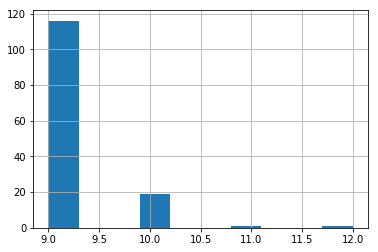

In [270]:
fin_strictpeptides[fin_strictpeptides["hamming3"] > 0]["length_pep"].hist()
plt.show()

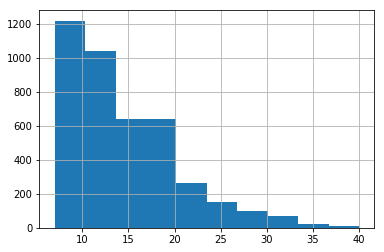

In [271]:
fin_strictpeptides["length_pep"].hist()
plt.show()

In [277]:
accl3 = []

for i in fin_strictpeptides["sequence_pep"]:
    accl3.append(len(list(dict.fromkeys(list(newtrie.all_levenshtein(i, 3))))))
    #               |-----------------|
    #                deduplicates the levenshtein hits

KeyboardInterrupt: 

## compute peptide specificities (fin-final)

In [68]:
# load Dmel peptides

import pandas as pd

fin_finalpeptides = pd.read_csv("~/results/Dmel_MSannot/fin_finalpeptides_annotated.csv", index_col=0)
metadata = pd.read_csv('~/results/Dmel_MSannot/fin_finalproteins_classes.csv')

In [70]:
acc1 = []

for i in fin_finalpeptides["sequence_pep"]:
    acc1.append(len(list(newtrie.all_hamming(i, 1))))

fin_finalpeptides["hamming1"] = acc1

In [69]:
acc1 = []

for i in fin_finalpeptides["sequence_pep"]:
    acc1.append(len(list(newtrie.all_hamming(i, 2))))

fin_finalpeptides["hamming2"] = acc1

In [71]:
accl1 = []

for i in fin_finalpeptides["sequence_pep"]:
    accl1.append(len(list(dict.fromkeys(list(newtrie.all_levenshtein(i, 1))))))
    #               |-----------------|
    #                deduplicates the levenshtein hits
    
fin_finalpeptides["levenshtein1"] = accl1

In [72]:
accl2 = []

for i in fin_finalpeptides["sequence_pep"]:
    accl2.append(len(list(dict.fromkeys(list(newtrie.all_levenshtein(i, 2))))))
    #               |-----------------|
    #                deduplicates the levenshtein hits
    
fin_finalpeptides["levenshtein2"] = accl2

In [87]:
fin_finalpeptides.drop_duplicates('sequence_pep').iloc[:,-3].value_counts()

0    3122
1       1
Name: hamming1, dtype: int64

In [88]:
#note that these must be contained in hamming 1
fin_finalpeptides.drop_duplicates('sequence_pep').iloc[:,-2].value_counts()

0    3122
1       1
Name: levenshtein1, dtype: int64

In [89]:
fin_finalpeptides.drop_duplicates('sequence_pep').iloc[:,-4].value_counts()

0    3117
1       6
Name: hamming2, dtype: int64

In [90]:
fin_finalpeptides.drop_duplicates('sequence_pep').iloc[:,-1].value_counts()

0    3093
1      28
2       2
Name: levenshtein2, dtype: int64

In [85]:
31 / fin_finalpeptides.sequence_pep.drop_duplicates().shape[0]

0.009926352865834135